In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

house_df = pd.read_csv('kc_house_data.csv')

## Exercise 1
a) Create and train simple regression model of sqft_living to price.  
b) Evaluate and visualise created model.  
c) Create and plot higher order polynomial regression models.

In [2]:
#a)

X = house_df.sqft_living.values.reshape(-1,1)[:1000]
y = house_df.price.values.reshape(-1)[:1000]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=8)


model = LinearRegression().fit(X_train, y_train)


Notes:

In this exercise, I'm employing linear regression and have divided the dataset into training and testing sets. This split ensures that a random process will yield the same results every time, promoting code reproducibility. Shuffling the dataset is vital for consistent training since not shuffling would result in different datasets each time.

To achieve this, I'm utilizing the `train_test_split` function. I've allocated a test size of 20% of the entire dataset and defined a random state. The random state value maintains dataset consistency, producing the same dataset for a given integer value.

The `fit` method used in this exercise trains the model. It takes an array of features as parameters and an array representing the response to these features.

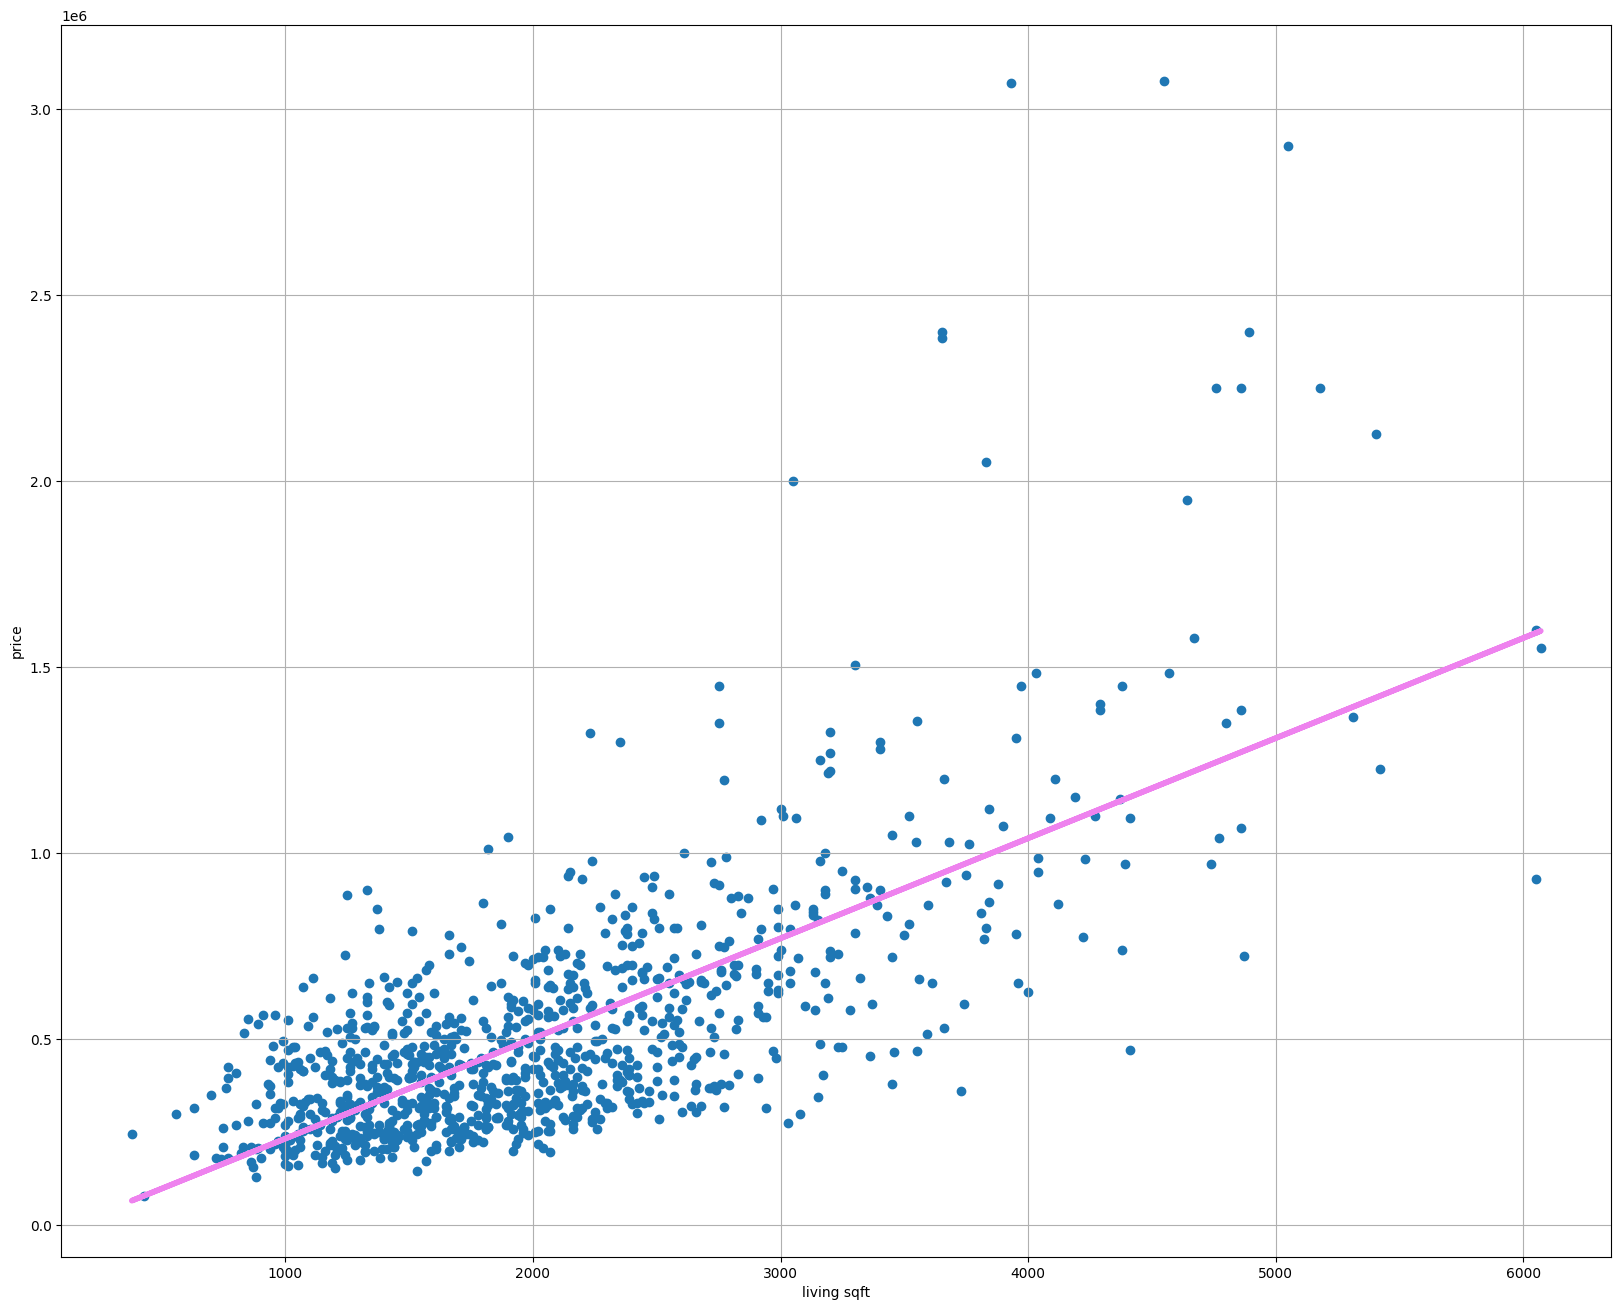

In [3]:
#b)

#Your code:
fig, ax = plt.subplots(figsize=(20, 16))
ax.set_xlabel('living sqft')
ax.set_ylabel('price')

ax.plot(X, (model.intercept_ + X * model.coef_), 'violet', linewidth=4)
ax.scatter(X, y)
ax.grid()


Notes:

In the chart above we can see rather a weak correlation between the price of the house and a living sqft parameter. I assume, it's because a larger appartment is not always equal to high price of the house. Also we use a linear regression model which is presented as a violet line that is fit though the data. According to the sklearn documentation, the line is plotted as close as possible to all points on average, but because the regression is simple it'rs hard to fit to this dataset. 

In [4]:
ms = model.score(X_test, y_test)
mse = mean_squared_error(X_test, y_test)

print('Model score is:', ms)
print('Mean squared error is:', mse)

Model score is: 0.45633091104987145
Mean squared error is: 395001974936.53


Notes:

in order to evaluate the quality of the model I have used the `mean_squared_error` method. It is a crucial metric for evaluating the performance of our predictive model. It measures the average squared difference between the predicted and the actual target values within the dataset.

The `score` method is used to determine the model accuracy. As we can see, the model score is 0.456 which indicates that the model explains aproximatelly 45.6% of hte variance in the target variable.

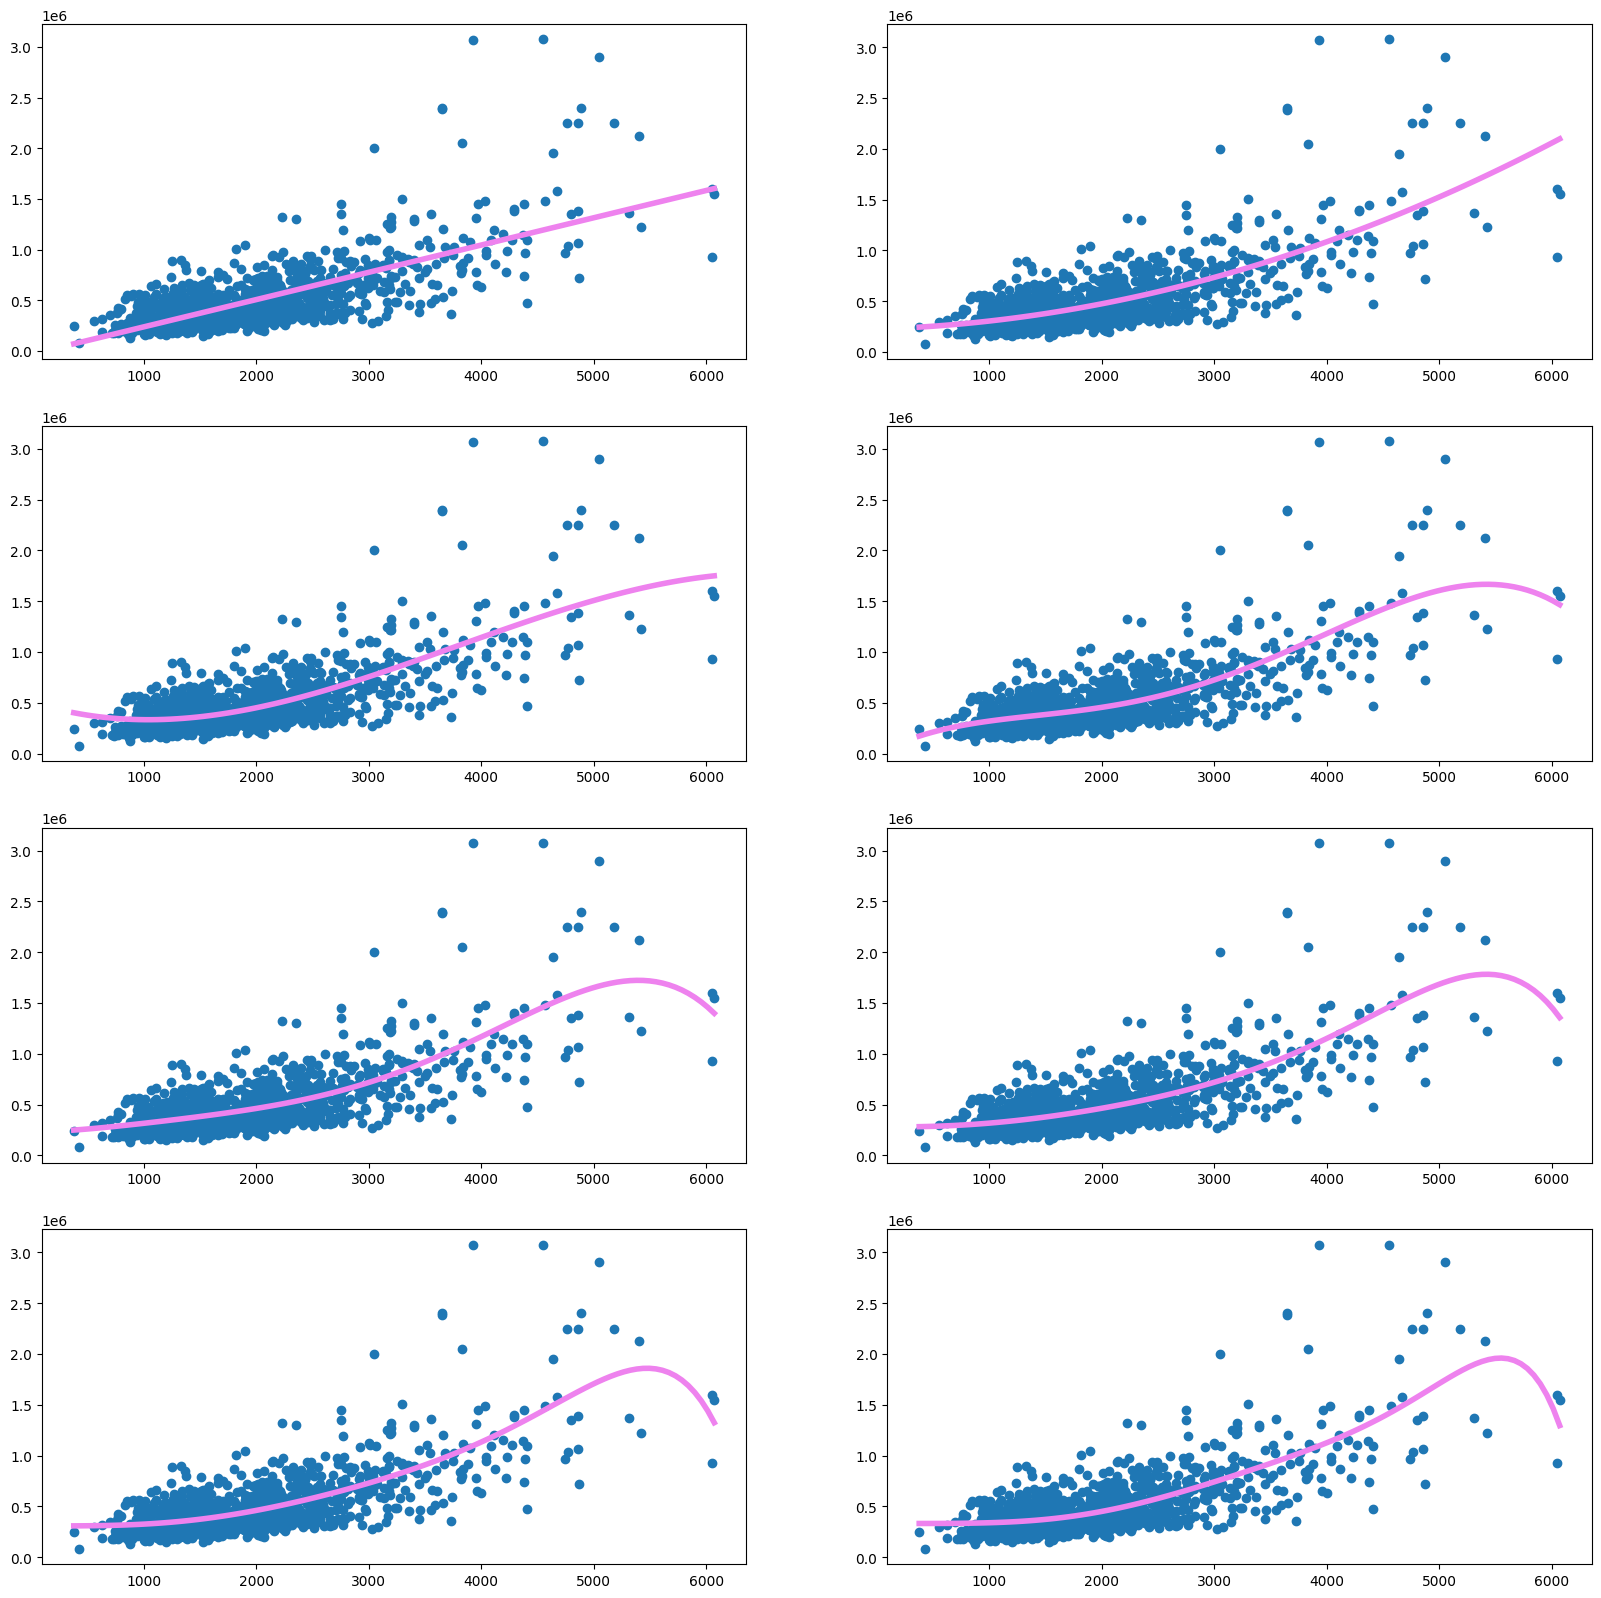

In [22]:
#c)
mean_array = []
fig, ax = plt.subplots(4, 2, figsize =(20, 20))

for order in range(1,9):

    
    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)
    
    model.fit(X_order, y)

    X_range = np.linspace(min(X), max(X), 100).reshape(-1, 1)
    X_range_ordering = poly.transform(X_range)

    y_predict = model.predict(X_range_ordering)

    column_queueing = 0 if order % 2 == 1 else 1

    ax[(order - 1) // 2, column_queueing].scatter(X, y)
    ax[(order - 1) // 2, column_queueing].plot(X_range, y_predict, 'violet', linewidth=4)

    mean_array.append(mean_squared_error(y, model.predict(X_order)))



Notes:

 in the chart above we see that with the higher order of polynomial the better the regression fit to the model.

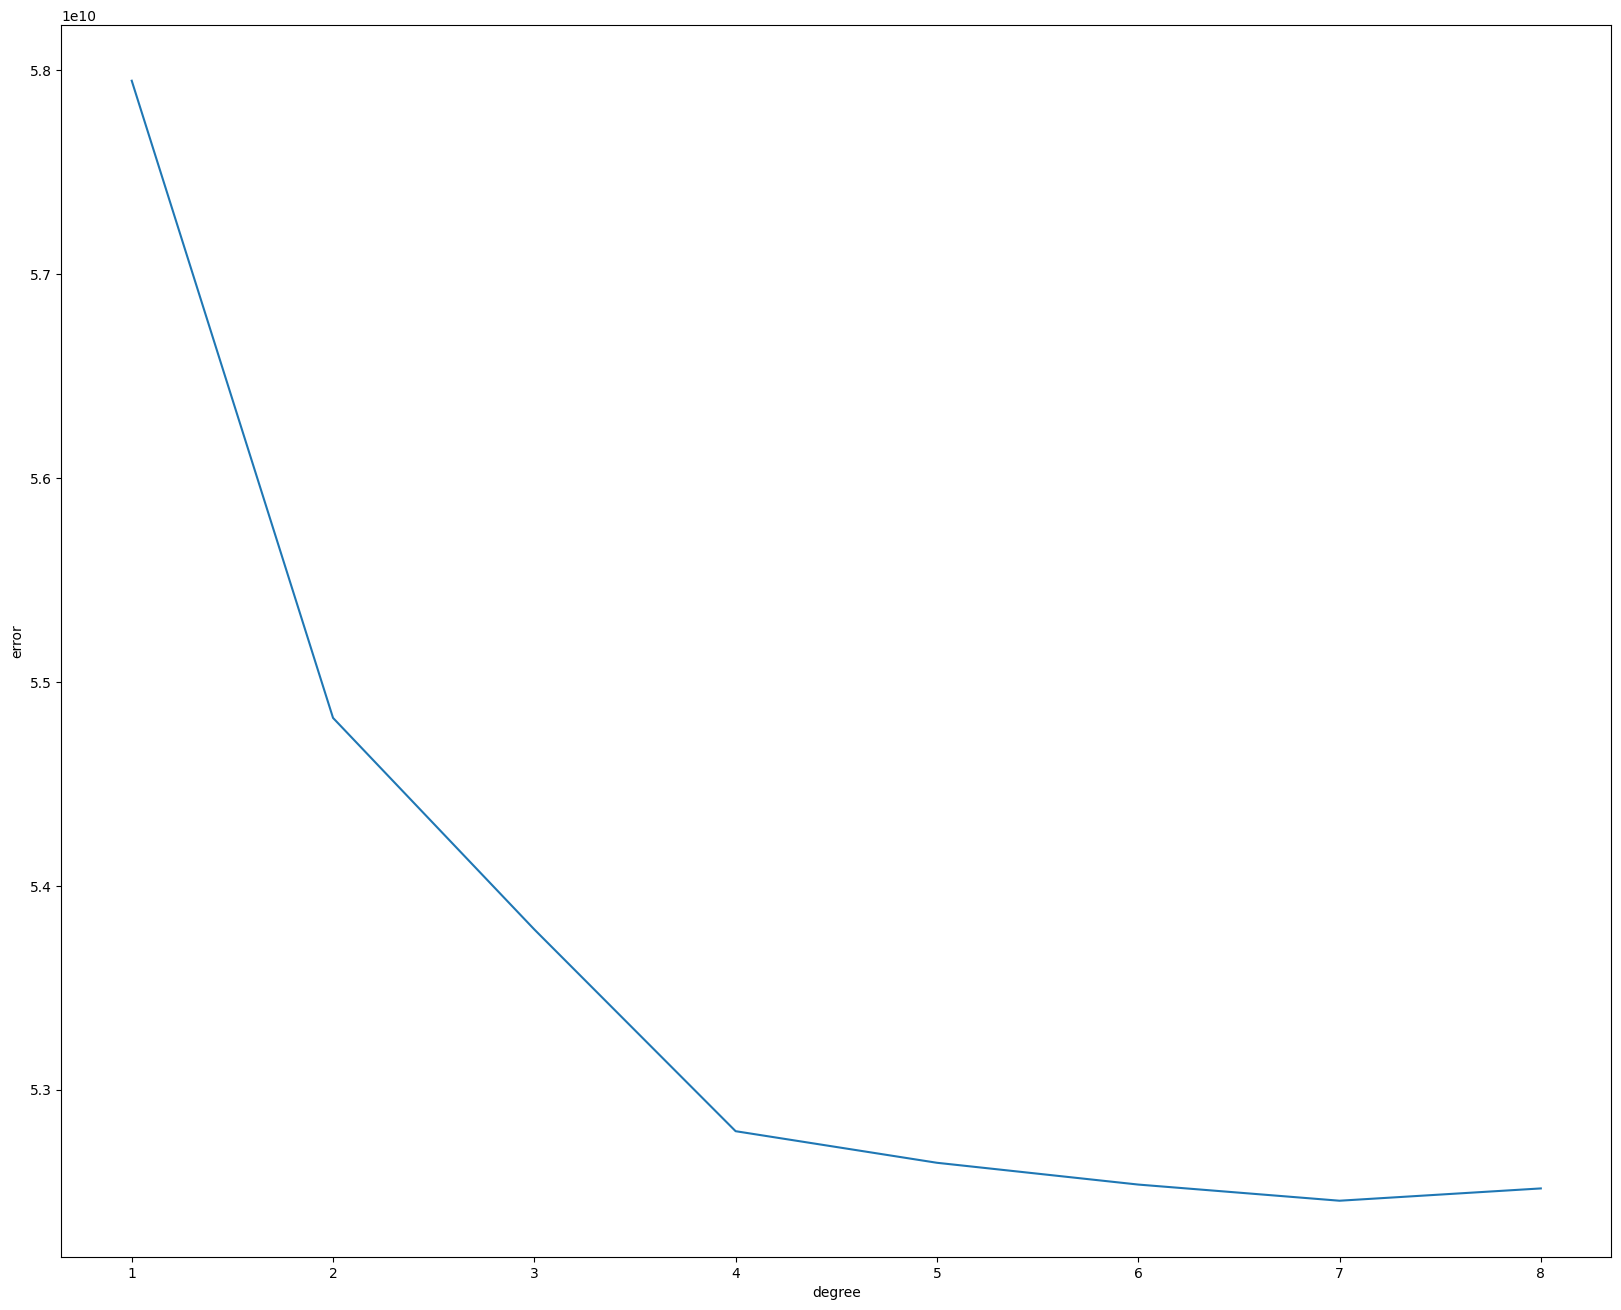

In [6]:
#Your code:
degree = list(range(1, 9))
fig, ax = plt.subplots(figsize=(20, 16))
ax.set_xlabel('degree')
ax.set_ylabel('error')
ax.plot(degree, mean_array)

## Exercise 2
In reality, we are not given the full dataset, so we need to create models which are able to handle unknown data.  
a) Split your data into training sample and test sample and repeat exercise 1 c). Plot training and test errors for all models. 

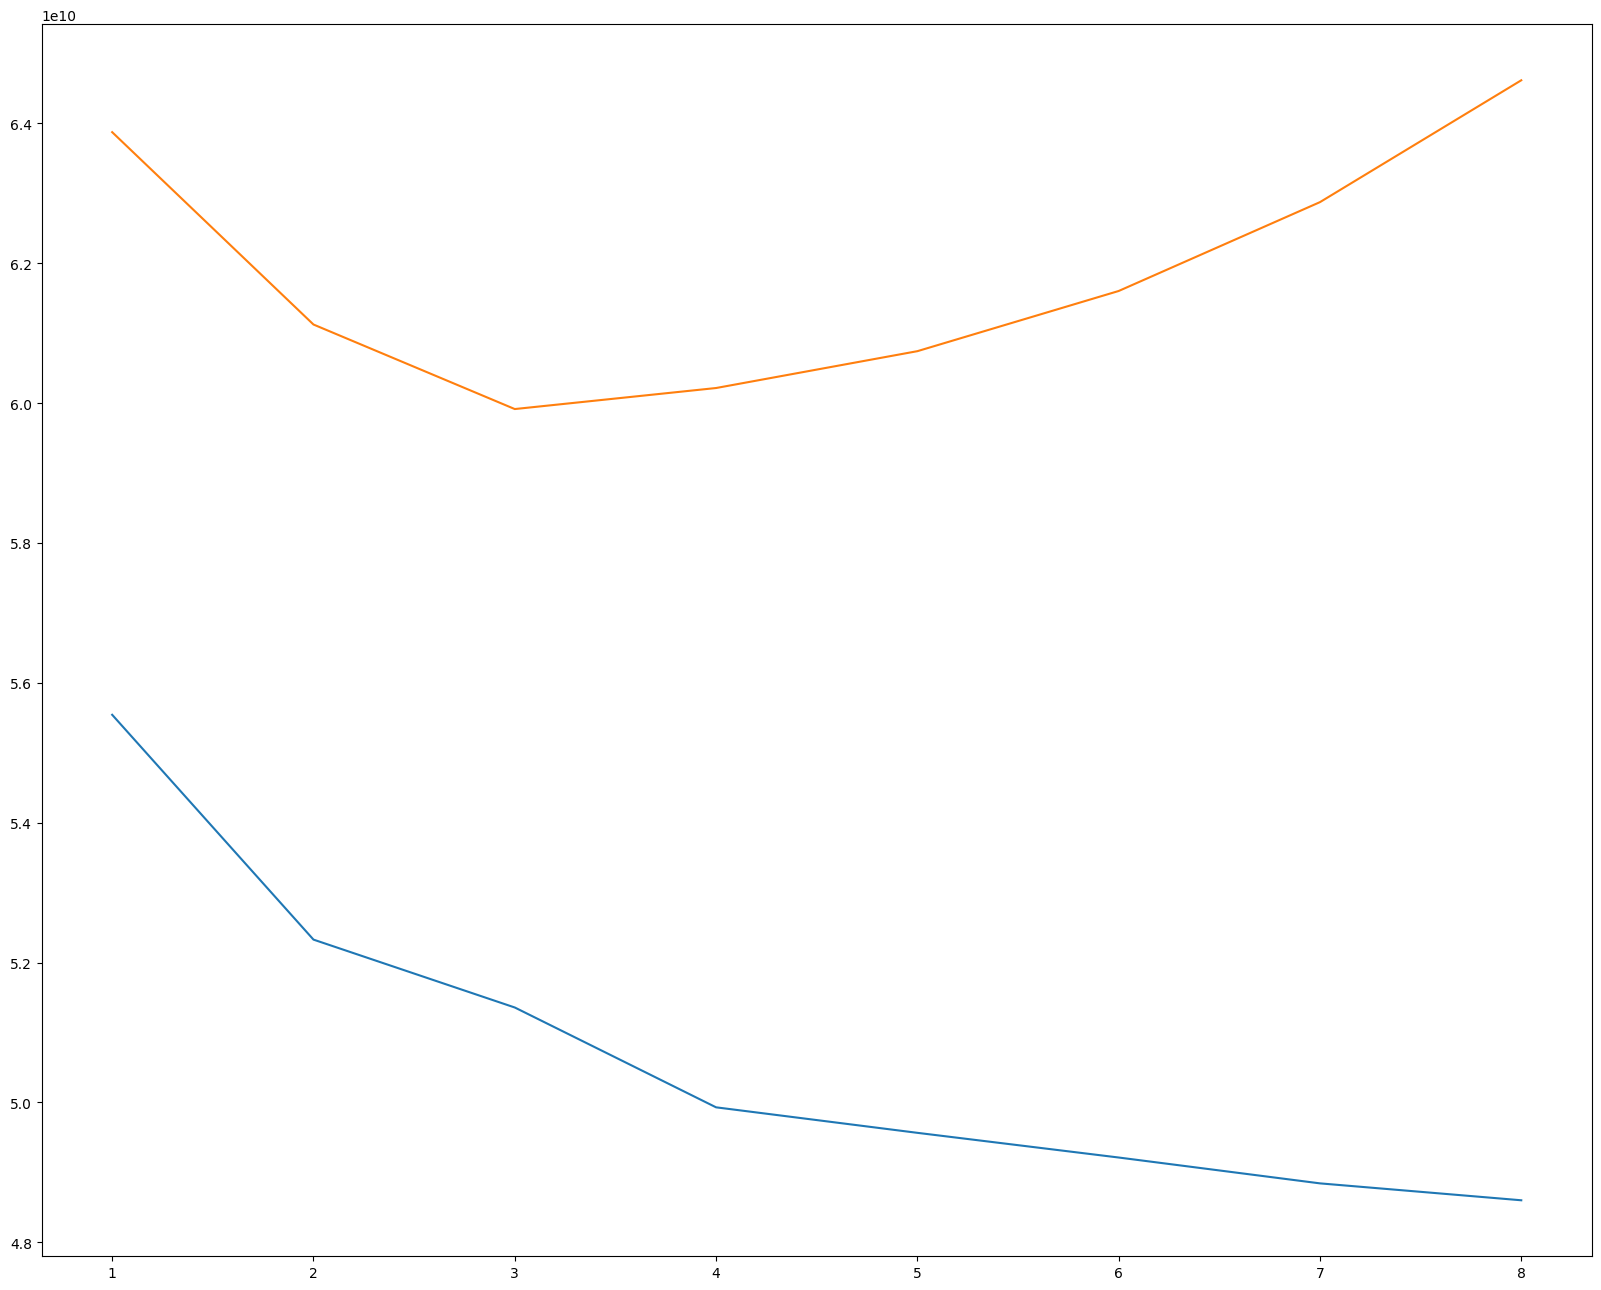

In [7]:
#a)
train_sample = []
test_sample = []



for order in range(1,9):
    poly = PolynomialFeatures(order, include_bias=False)
    X_order = poly.fit_transform(X)

    
    X_train, X_test, y_train, y_test = train_test_split(X_order, y, test_size=0.3, random_state=44)
    
    model.fit(X_train, y_train)

    y_predict = model.predict(X_train)
    train_sample.append(mean_squared_error(y_train, y_predict))

    y_predict = model.predict(X_test)
    test_sample.append(mean_squared_error(y_test, y_predict))

fig, ax = plt.subplots(figsize=(20, 16))
ax.plot(degree, train_sample)
ax.plot(degree, test_sample)

## Exercise 3
a) Train model to predict sqft_living for a given house price. Plot predictions.  
b) Apply more features and propose better model for predicting house prices. Try to beat proposed one.

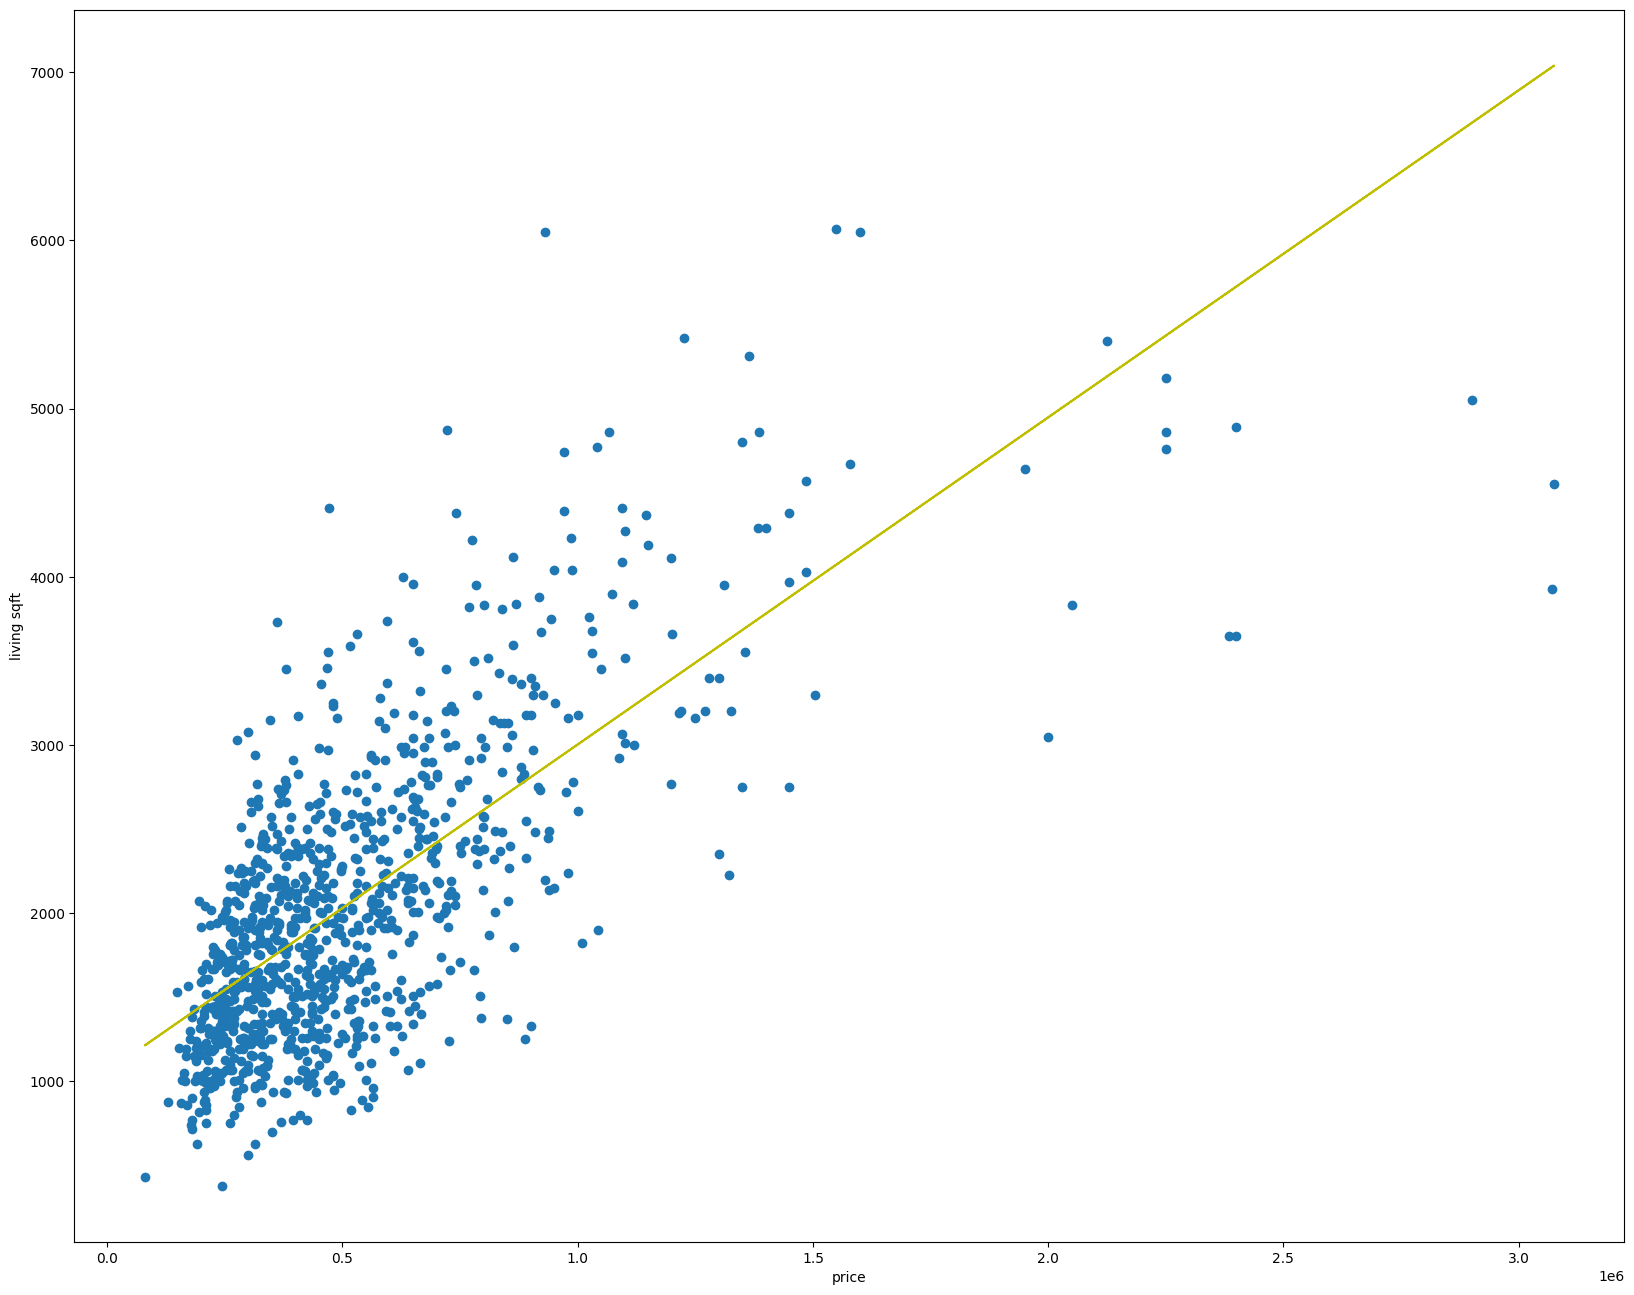

In [8]:
#a)

X = house_df.price.values.reshape(-1,1)[:1000]
y = house_df.sqft_living.values.reshape(-1)[:1000]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = LinearRegression()
model.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(20, 16))
ax.set_xlabel('price')
ax.set_ylabel('living sqft')

ax.plot(X, (model.intercept_ + X * model.coef_ ), 'y')
ax.scatter(X, y)


In [9]:
#b) Let's propose model, which uses living sqft, lot sqft, grade, view and all of their interactions up to third degree

X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view']].values.reshape(-1,4)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))


Mean squared error equals: 48749250331.21729


In [51]:
X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view']].values.reshape(-1,4)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=40)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))

Mean squared error equals: 42373622724.277664


In [50]:
X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view', 'bedrooms']].values.reshape(-1,5)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=40)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))

Mean squared error equals: 160535022128.22552
